### 1.B DATA VISUALIZATION

Importing required libraries/packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
from collections import Counter
warnings.filterwarnings("ignore")

Load the processed dataset

In [2]:
df_train = pd.read_csv('processed_essays.csv')

In [3]:
def string_to_list(string):
    return string.split()

In [4]:
def nan_to_blank(val):
    if pd.isna(val) or val is None:
        return ''
    else:
        return val

In [5]:
df_train['lemmatized_text'] = df_train['lemmatized_text'].apply(string_to_list)
df_train['cleaned_tokenize_text'] = df_train['cleaned_tokenize_text'].apply(string_to_list)
df_train['corrected_text'] = df_train['corrected_text'].apply(string_to_list)
df_train['mistakes'] = df_train['mistakes'].apply(nan_to_blank)
df_train['mistakes'] = df_train['mistakes'].apply(string_to_list)

As a first thing, let's see which words are prominent in the essays and try to understand the importance of words using wordcloud and plotting the top-30 words on the basis of their respective frequency.

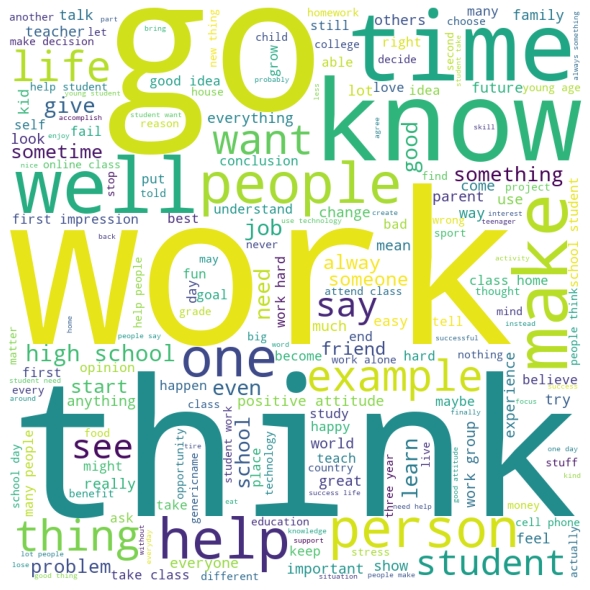

In [6]:
# Convert the list of tokenized words to a string for each row in the column
text = df_train['lemmatized_text'].apply(lambda x: ' '.join(x))

# Join the strings
words = ' '.join(text.tolist())

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)


# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

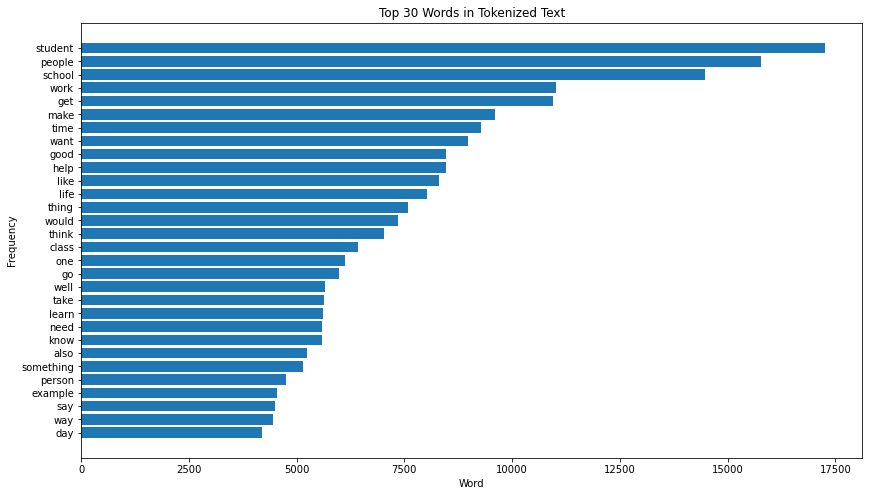

In [7]:
# Flatten the list of tokenized words
words = [word for sentence in df_train['lemmatized_text'] for word in sentence]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 30 most common words and their frequencies
word_list = word_freq.most_common(30)

# Sort the word list in descending order of frequency
word_list = sorted(word_list, key=lambda x: x[1], reverse=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar chart of the word frequencies
plt.barh([word[0] for word in word_list], [word[1] for word in word_list])

# Set the chart title and axis labels
plt.title('Top 30 Words in Tokenized Text')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Show the chart
plt.show()

We see from above visualizations that student, people, and school are the three top most used words in the essay. This further gives some insight that essays could be more likely to be related to education, learning, or group of individuals in education.

Let's try to understand more in terms of how long the essays are written by students,  number of sentences used by students in essays, what is the lenght of those sentences or how many words does these essay contain.

Average essay length written by a student: 2335
Minimum essay length written by a student: 82
Maximum essay length written by a student: 6044


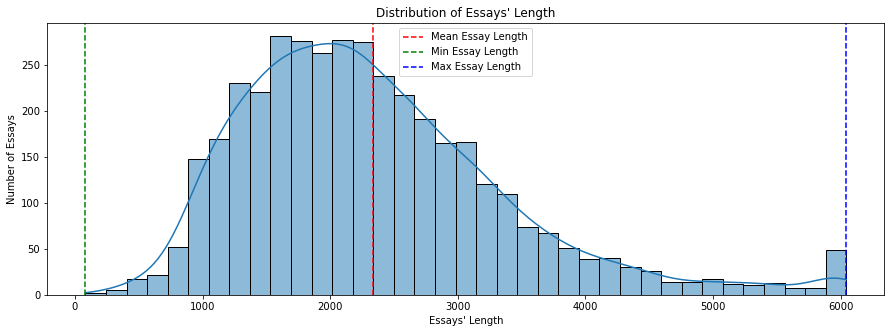

In [8]:
# Compute the length of each essay
essay_lengths = df_train['full_text'].apply(len)

# Compute the statistics
mean_length = essay_lengths.mean()
print('Average essay length written by a student:', round(mean_length))

min_length = essay_lengths.min()
print('Minimum essay length written by a student:', round(min_length))

max_length = essay_lengths.max()
print('Maximum essay length written by a student:', round(max_length))

# Set the figure size and style
plt.figure(figsize=(15, 5))


# Plot the distribution of essay lengths
sns.histplot(data=essay_lengths, kde=True)

# Add a vertical line for the mean essay length
plt.axvline(x=mean_length, color='red', linestyle='--', label='Mean Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=min_length, color='green', linestyle='--', label='Min Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=max_length, color='blue', linestyle='--', label='Max Essay Length')

# Set the title and labels
plt.title("Distribution of Essays' Length")
plt.xlabel("Essays' Length")
plt.ylabel("Number of Essays")

# Add a legend
plt.legend()

# Show the plot
plt.show()

It can be seen from the above that some students have written very lengthy essays which skews the overall distribution towards right. 

Average Number of Sentences in an Essay: 18
Minimum Number of Sentences in an Essay: 1
Maximum Number of Sentences in an Essay: 99


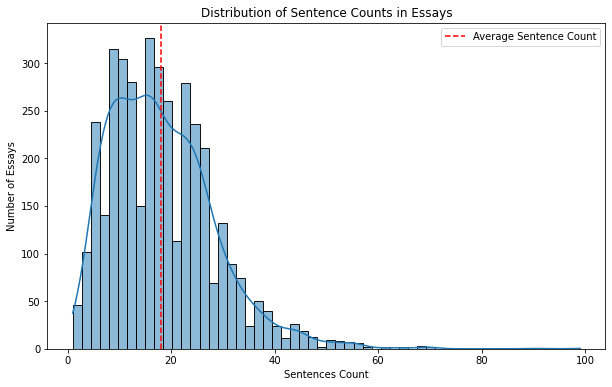

In [9]:
avg_sent = round(df_train['sent_count'].mean())
print('Average Number of Sentences in an Essay: {}'.format(avg_sent))

min_sent = round(df_train['sent_count'].min())
print('Minimum Number of Sentences in an Essay: {}'.format(min_sent))

max_sent = round(df_train['sent_count'].max())
print('Maximum Number of Sentences in an Essay: {}'.format(max_sent))

# Set the figure size and style
plt.figure(figsize=(10, 6))

# Plot the distribution of sentence counts
title = 'Distribution of Sentence Counts in Essays'
sns.histplot(df_train['sent_count'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Sentence Count')
plt.legend()
plt.title(title)
plt.xlabel('Sentences Count')
plt.ylabel('Number of Essays')

# Show the plot
plt.show()

Above makes sense as students are expected to write distinct number of sentences in essay. The number of sentences might also impacted with the topic of essays assigned to students.

Average Sentence Length: 30
Min Sentence Length: 6
Max Sentence Length: 578


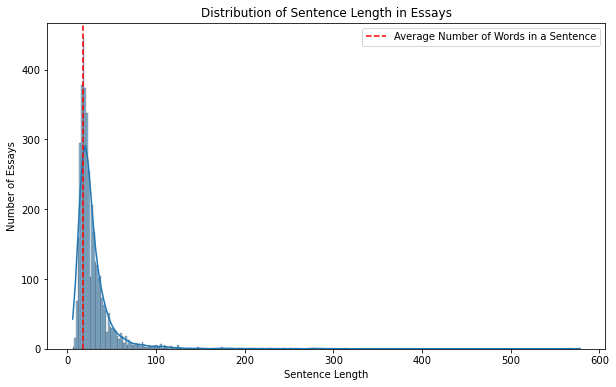

In [10]:
avg_sent_len = round(np.mean(df_train['sent_len']))
print('Average Sentence Length: {}'.format(avg_sent_len))

min_sent_len = round(np.min(df_train['sent_len']))
print('Min Sentence Length: {}'.format(min_sent_len))

max_sent_len = round(np.max(df_train['sent_len']))
print('Max Sentence Length: {}'.format(max_sent_len))

# Set the figure size and style
plt.figure(figsize=(10, 6))

# Plot the distribution of sentence length
title = 'Distribution of Sentence Length in Essays'
sns.histplot(df_train['sent_len'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Number of Words in a Sentence')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Essays')

# Show the plot
plt.show()

Distribution of sentences count is highly rightly skewed in nature, which signifies that how some students exceptionally wrote sentences with more words. 

Mean word count in essay: 430
Min word count in essay: 14
Max word count in essay: 1260


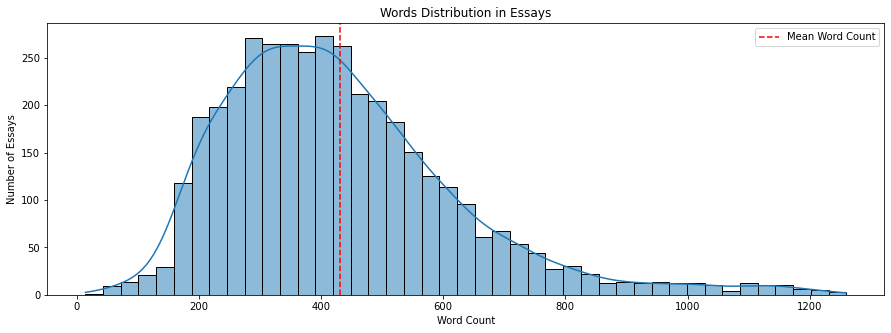

In [11]:
# Set the figure size and style
fig = plt.figure(figsize=(15, 5))

# Plot the distribution of word count
sns.histplot(data=df_train, x="word_count", kde=True)

# Plot the mean of word count
mean_word_count = df_train['word_count'].mean()
print('Mean word count in essay:', round(mean_word_count))

min_word_count = df_train['word_count'].min()
print('Min word count in essay:', round(min_word_count))

max_word_count = df_train['word_count'].max()
print('Max word count in essay:', round(max_word_count))

plt.axvline(x=mean_word_count, color='red', linestyle='--', label='Mean Word Count')
plt.legend()

# Set the title and labels
plt.title("Words Distribution in Essays")
plt.xlabel("Word Count")
plt.ylabel("Number of Essays")

# Show the plot
plt.show()


This visualization is in alignment with the essay length signifying how some students used more words to write essays and made the normal distribution rightly skewed.